# Machine Learning Utils - Classification example: Titanic dataset (Kaggle)

### 0 - Setup

In [1]:
from ml_utils import *

In [2]:
dtf = pd.read_csv('http://bit.ly/kaggletrain')
dtf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


len dtf: 891
PassengerId --> Nas: 0 (0.0%)
    # possible pk
Survived --> Nas: 0 (0.0%)
Pclass --> Nas: 0 (0.0%)
Name --> Nas: 0 (0.0%)
    # possible pk
Sex --> Nas: 0 (0.0%)
Age --> Nas: 177 (19.900000000000002%)
SibSp --> Nas: 0 (0.0%)
Parch --> Nas: 0 (0.0%)
Ticket --> Nas: 0 (0.0%)
Fare --> Nas: 0 (0.0%)
Cabin --> Nas: 687 (77.10000000000001%)
Embarked --> Nas: 2 (0.2%)


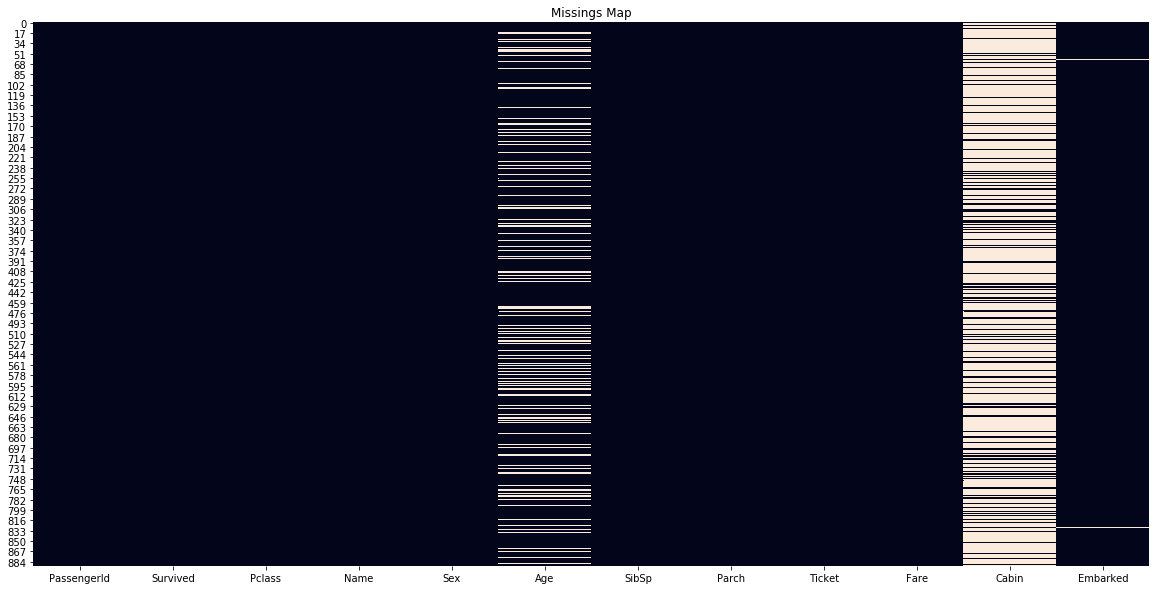

In [3]:
check_Nas(dtf, plot="map")

### 1 - Data Analysis

###### Group variables by info
- pk: PassengerId, Name
- y: Survived
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

In [15]:
features = []

###### Target Variable

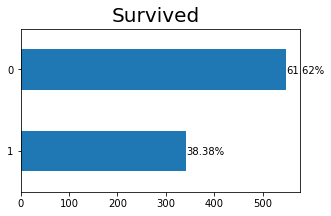

In [4]:
freqdist_plot(dtf, "Survived", figsize=(5,3))

In [16]:
# Population mean: 38% of the passengers survived

###### 1.1 - Who? Sex, Age, Embarked

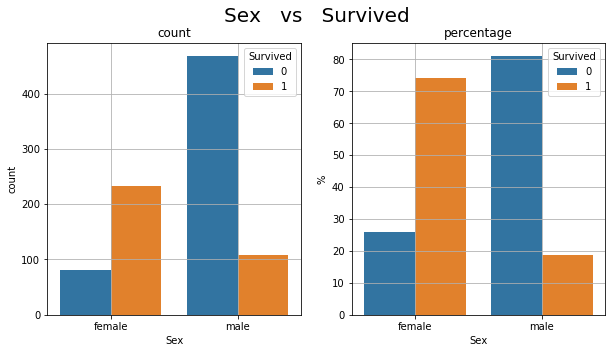

In [5]:
# Sex
bivariate_plot(dtf, x="Sex", y="Survived", figsize=(10,5))

In [17]:
## Sex is Predictive: the surviving rate of females is higher.
features.append("Sex")

In [7]:
# Age
dtf["Age"].mean()

29.69911764705882

In [8]:
dtf["Age"] = dtf["Age"].fillna( dtf["Age"].mean() )

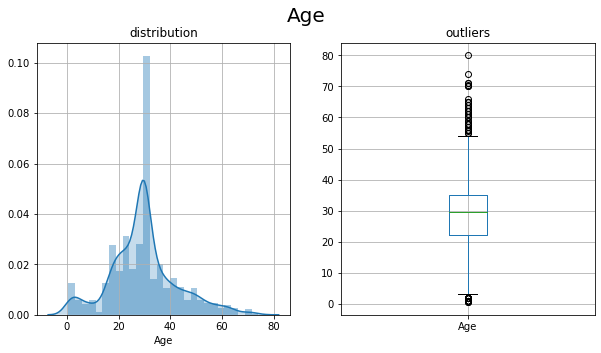

In [9]:
freqdist_plot(dtf, "Age", figsize=(10,5))

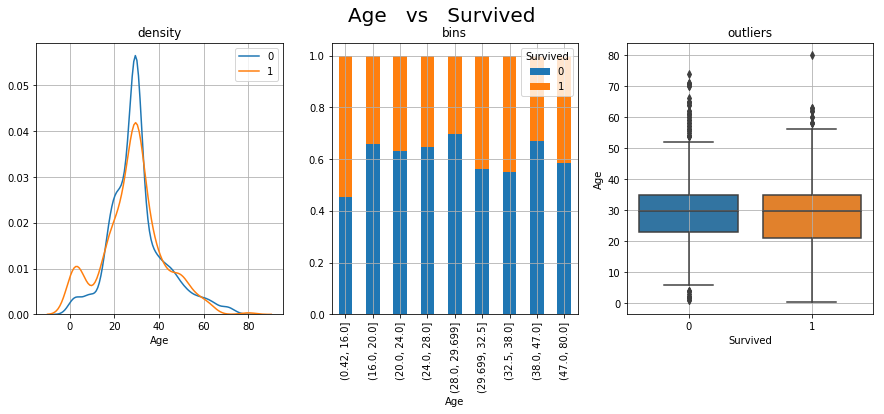

In [19]:
bivariate_plot(dtf, x="Age", y="Survived", figsize=(15,5))

In [18]:
## Age is Predictive: the Surviving rate is higher for younger passengers, there is a spike in the left tail of Y=1 
## distribution and the first bin of Age (0-16) contains the highest percentage of survived people.
features.append("Age")

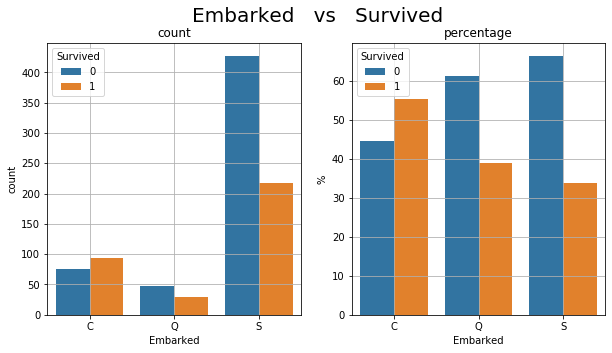

In [12]:
# Embarked
bivariate_plot(dtf, x="Embarked", y="Survived", figsize=(10,5))

In [20]:
coeff, p = test_corr(dtf, x="Embarked", y="Survived")

Cramer Correlation: 0.166 Significant (p-value: 0.0)


In [21]:
## Embarked is Predictive: People from port C tend to survive better (that can be because they stayed in a fortunate area
## of the ship or just because they're smarter). Since there aren't many observations, I tested the significance 
## of the correlation (Cramer cat vs cat), it passed.
features.append("Embarked")

###### 1.2 - Wealth? Pclass, Ticket, Fare

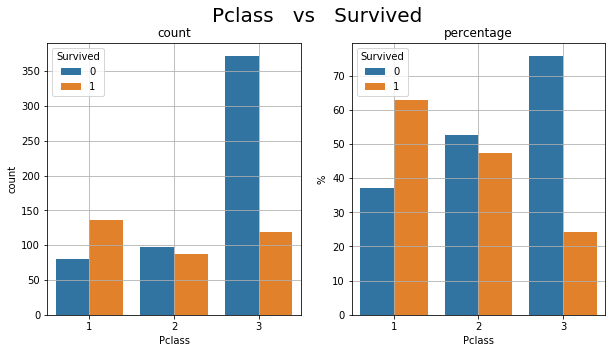

In [20]:
# Pclass
bivariate_plot(dtf, x="Pclass", y="Survived", figsize=(10,5))

In [22]:
## Pclass is Predctive: the richer the higher the probability of surviving.
features.append("Pclass")

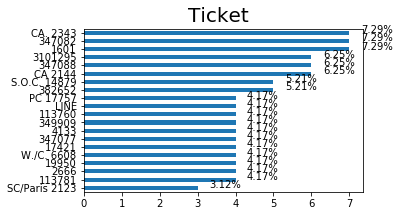

In [23]:
# Ticket
freqdist_plot(dtf, "Ticket", figsize=(5,3))

In [24]:
## Useless

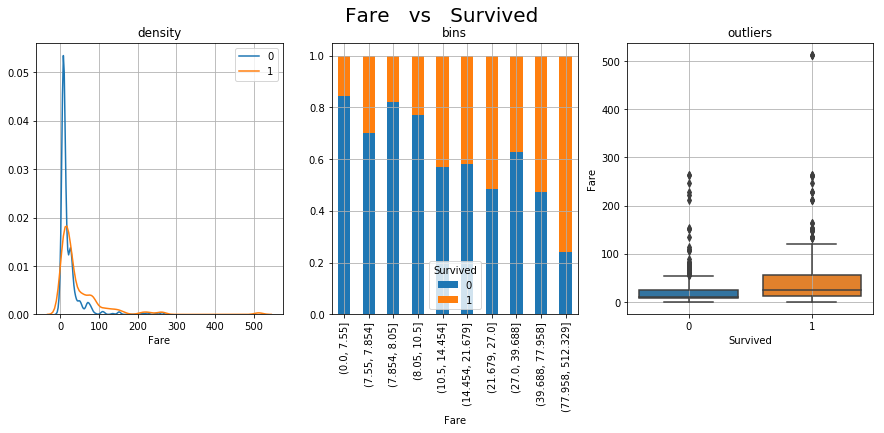

In [22]:
# Fare
bivariate_plot(dtf, x="Fare", y="Survived", figsize=(15,5))

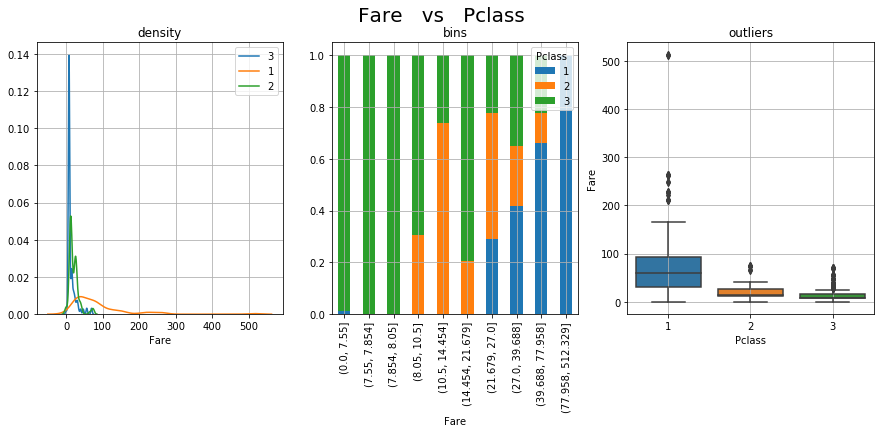

In [25]:
## Fare is Predictive: it gives the same info of Pclass
bivariate_plot(dtf, x="Fare", y="Pclass", figsize=(15,5))

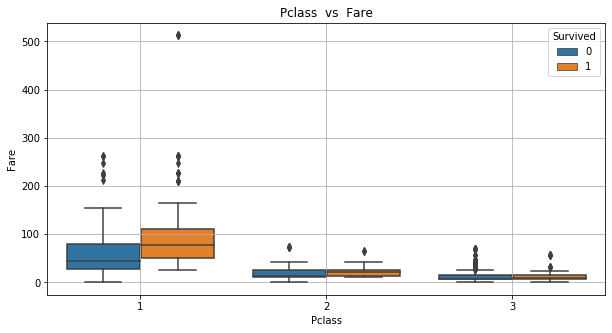

In [55]:
cross_distributions(dtf, x1="Pclass", x2="Fare", y="Survived", figsize=(10,5))

In [36]:
## Looks there is more information in the first class: who paid higher price survived better.
## I will keep it for now and exclude one of the two in the Features Selection section.
features.append("Fare")

###### 1.3 - Where? Cabin

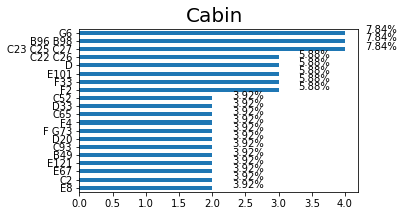

In [38]:
# Cabin
freqdist_plot(dtf, "Cabin", figsize=(5,3))

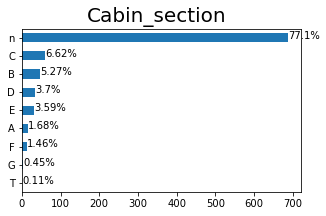

In [45]:
## Useless like this, let's see if the variable can be clustered using the first letter of the cabin:
dtf["Cabin_section"] = dtf["Cabin"].apply(lambda x: str(x)[0])
freqdist_plot(dtf, "Cabin_section", figsize=(5,3))

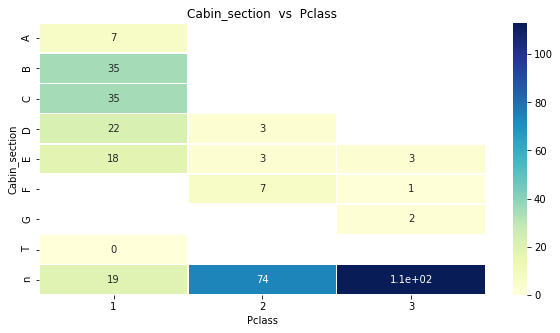

In [53]:
cross_distributions(dtf, x1="Cabin_section", x2="Pclass", y="Survived", figsize=(10,5))

###### 1.4 - How many? SibSp, Parch

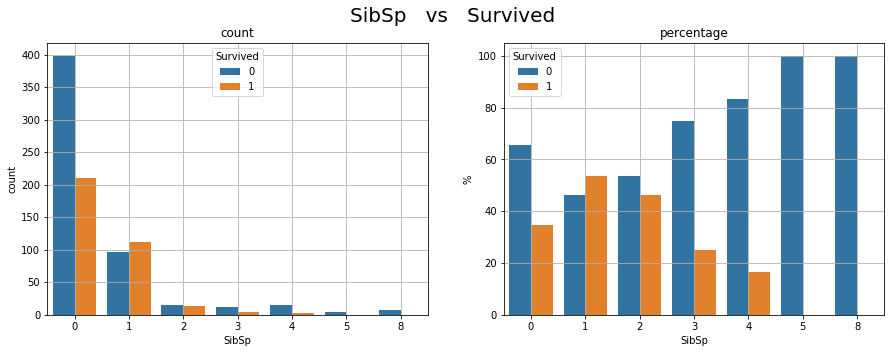

In [71]:
bivariate_plot(dtf, x="SibSp", y="Survived", figsize=(15,5))

In [90]:
features.append("SibSp")

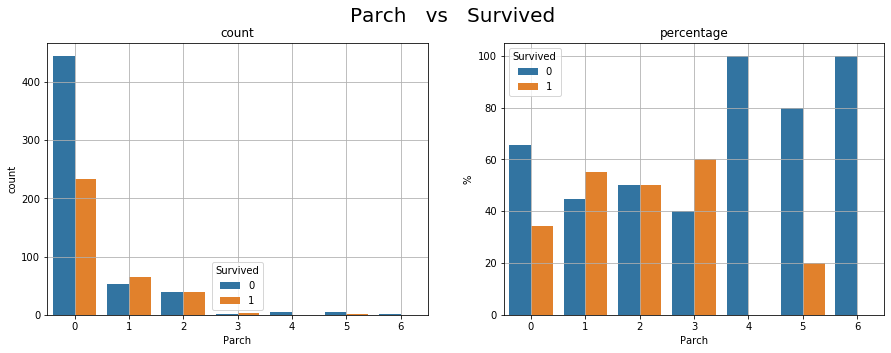

In [72]:
bivariate_plot(dtf, x="Parch", y="Survived", figsize=(15,5))

In [91]:
features.append("Parch")

###### Summary

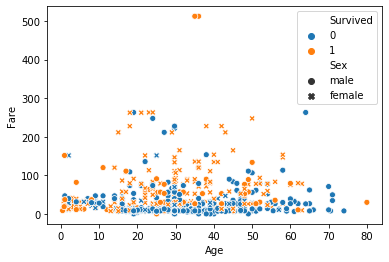

In [75]:
sns.scatterplot(data=dtf, x="Age", y="Fare", hue="Survived", style="Sex")

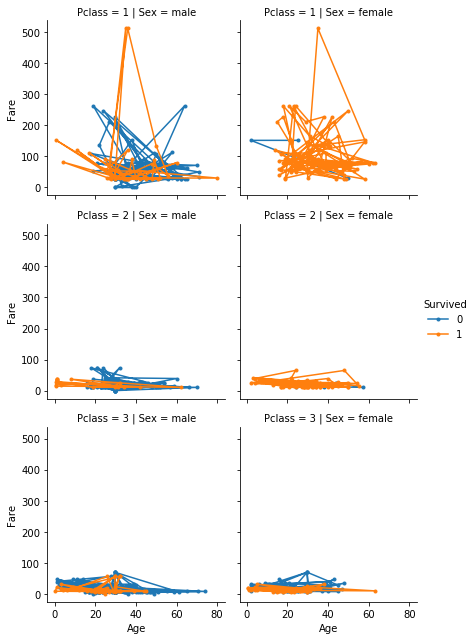

In [92]:
g = sns.FacetGrid(dtf, col="Sex",  row="Pclass", hue="Survived")
g.map(plt.plot, "Age", "Fare", marker=".").add_legend()

In [93]:
features

['Sex', 'Age', 'Embarked', 'Pclass', 'Fare', 'SibSp', 'Parch']

### 2 - Baseline

### 3 - Model Desing & Testing